# 16.A: Code for ODE Solvers

## Euler's Method

* $y_0 = c$
* for $i = 0, ..., N-1$
    * $y_{i+1} = y_i + hf(t_i, y_i)$ for $i=-, ..., N-1$
* end the for loop

In [6]:
%%file euler.m

% Code for Euler's method for solving ODE of the form y'=f(t,y)
% INPUTS:
% f = function handle, f(t,y)
% [a,b] = vector givin the time interval
% c = initial condition so that y(a) = c
% N = number of steps

function [t,y] = euler(f, T, c, N)
    a = T(1);
    b = T(2);
    h = (b-a)/N; % Step size
    t = a:h:b; % Vector of time steps
    y = zeros(size(t)); % Solution vector
    y(1) = c;
    
    for i = 1: N
        y(i+1) = y(i) + h * f(t(i), y(i));
    end
end

Created file 'C:\Users\bushn\Home\Notes\STEM-Notes\MATH350 Numerical Methods\Chapter 16 - Ordinary Differential Equations\euler.m'.


If we use $y' = -y$, then we can solve this ODE by hand:

$$
\begin{aligned}
    y' &= -y\\
    \frac{dy}{dt} &= -y\\
    \int \frac{1}{y}\:dy &= \int-\:dt\\
    \ln(y) &= -t + C\\
    y &= ke^{-t}\\
    y(0) &= k = 1\\
    y(t) &= e^{-t}
\end{aligned}
$$

Now we can use our code to see how close we get:

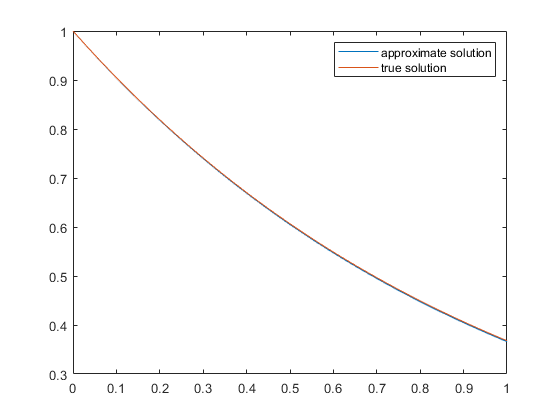

In [9]:
f = @(t,y) -y;

a = 0; b = 1;
T = [a,b];
c = 1; % y(a) = c
N = 100;
ytrue = @(t) exp(-t);

[t1,y1] = euler(f, T, c, N);

plot(t1,y1, t1, ytrue(t));
legend('approximate solution', 'true solution');

## Runge-Kutta 2-Stage

* $y_0 = c$
* for $i = 0, ..., N-1$
    * $k_1 = hf(t_i, y_i)$
    * $k_2 = hf(t_{i+1}, y_i+k_1)$
    * $y_{i+1} = y_i + \frac{k_1+k_2}{2}$

In [11]:
%%file rungeKutta2.m

function [t,y] = rungeKutta2(f, T, c, N)
    a = T(1);
    b = T(2);
    h = (b-a)/N; % Step size
    t = a:h:b; % Vector of time steps
    y = zeros(size(t)); % Solution vector
    y(1) = c;
    
    for i = 1: N
        k1 = h * f(t(i), y(i));
        k2 = h * f(t(i+1), y(i) + k1);
        y(i+1) = y(i) + (k1+k2)/2;
    end
end

Created file 'C:\Users\bushn\Home\Notes\STEM-Notes\MATH350 Numerical Methods\Chapter 16 - Ordinary Differential Equations\rungeKutta2.m'.


In [ ]:
function [t,y] = rungeKutta4(f, T, c, N)
    a = T(1);
    b = T(2);
    h = (b-a)/N; % Step size
    t = a:h:b; % Vector of time steps
    y = zeros(size(t)); % Solution vector
    y(1) = c;
    
    for i = 1: N
        k1 = h * f(t(i), y(i));
        k2 = h * f(t(i) + h/2, y(i) + k1/2);
        k3 = h * f(t(i+1))
        y(i+1) = y(i) + (k1+k2)/2;
    end
end

## General $p^{th}$ order RK method

* $y_0 = c$
* for $i = 0,...,N-1$
    * $k_1 = hf(t_i, y_i)$
    * for $j = 2, 3, ..., p$
        * $k_j = hf(t_i+hd_j, y_i + \sum_{m=1}^{j-1}c_{j,m}k_m$
    * $y_{i+1} = y_i + \sum_{m=1}^p b_m k_m$

* This has an error of $\mathcal{O}(h^p)$ (both local and general)